## hello hiring,
###    Data is huge in size because of that compatibility tranformation analysis of data. i used two method here 
    1st- Divide  data into five parts calibrate with this information
    2nd- data done full parts 
    
    analysis-  data is imbalanced in for take model accuracy in good way way have t find Precision Recal and F1 score.
    mov-avg. f1 score is main thing to find best result

In [36]:
import pandas as pd
import numpy as np

In [37]:
df=pd.read_csv("Fraud.csv")

In [38]:
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [39]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [40]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [41]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [43]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

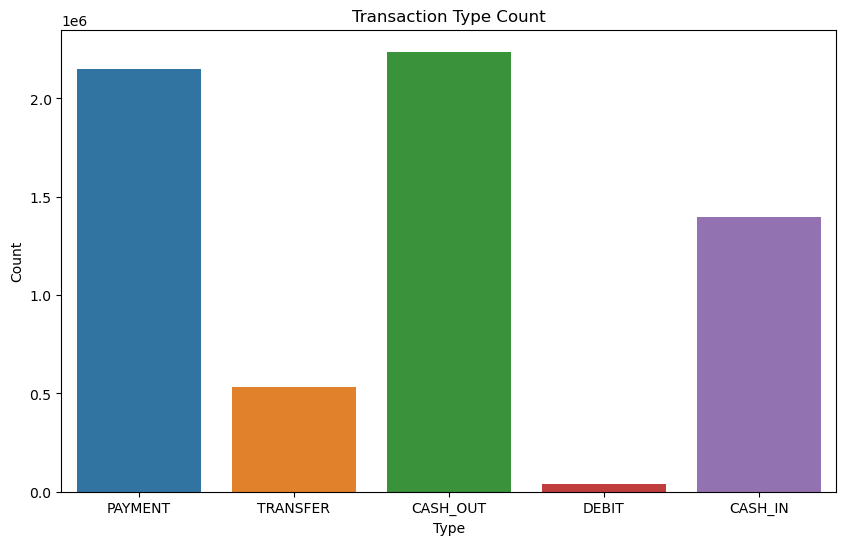

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type')
plt.title('Transaction Type Count')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


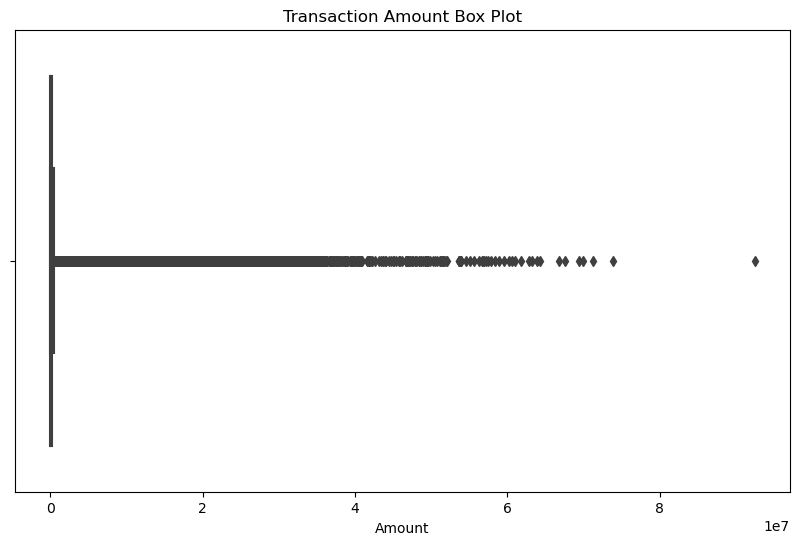

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='amount', data=df)
plt.title('Transaction Amount Box Plot')
plt.xlabel('Amount')
plt.show()


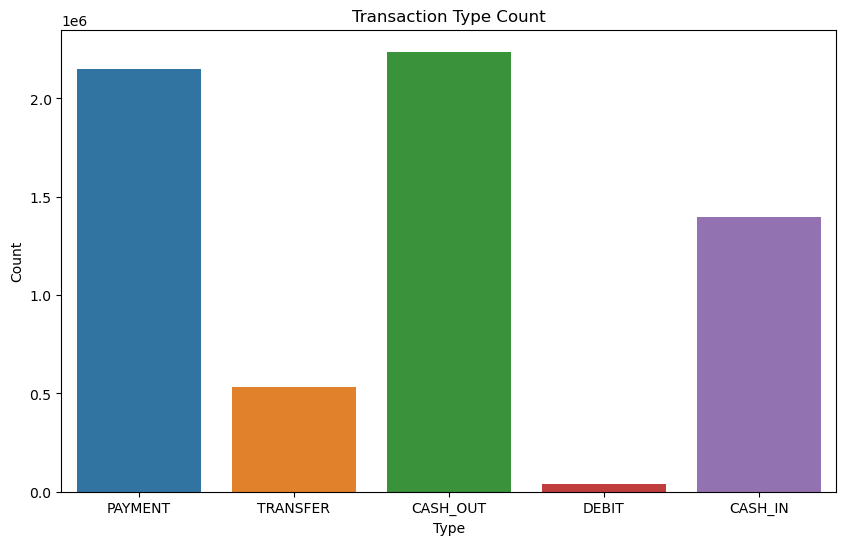

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type')
plt.title('Transaction Type Count')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

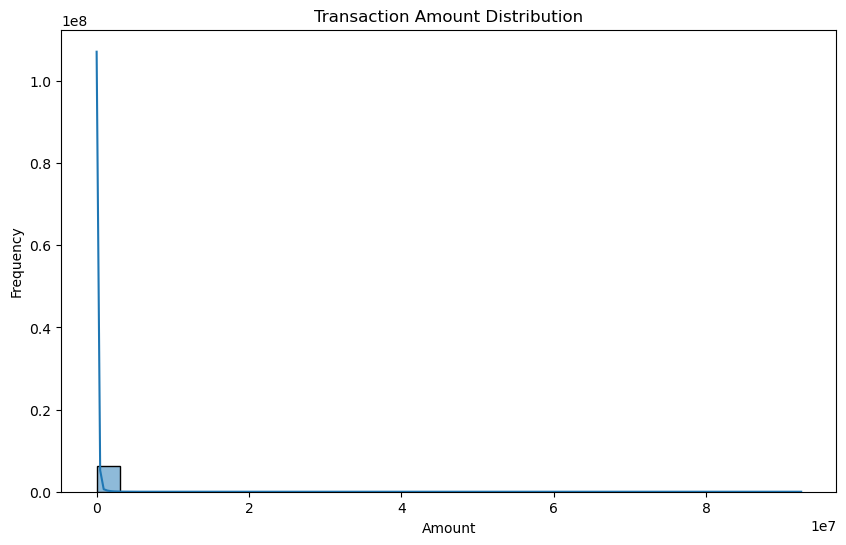

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=30, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


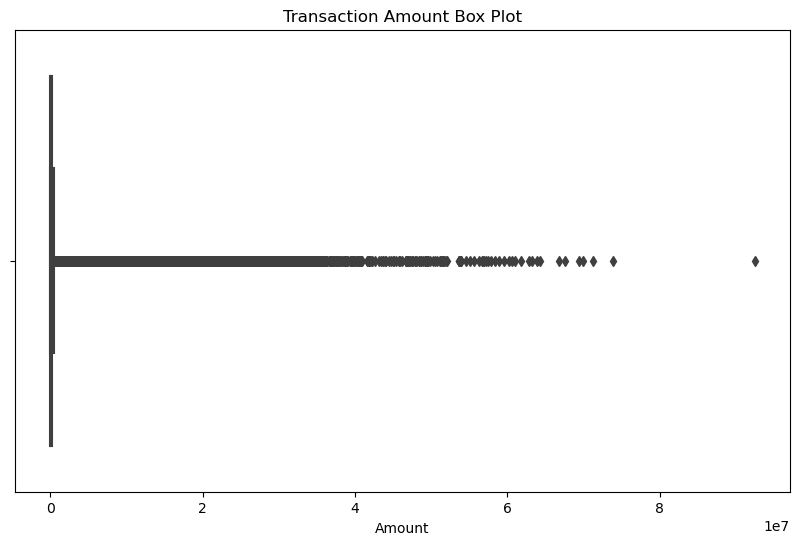

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='amount', data=df)
plt.title('Transaction Amount Box Plot')
plt.xlabel('Amount')
plt.show()


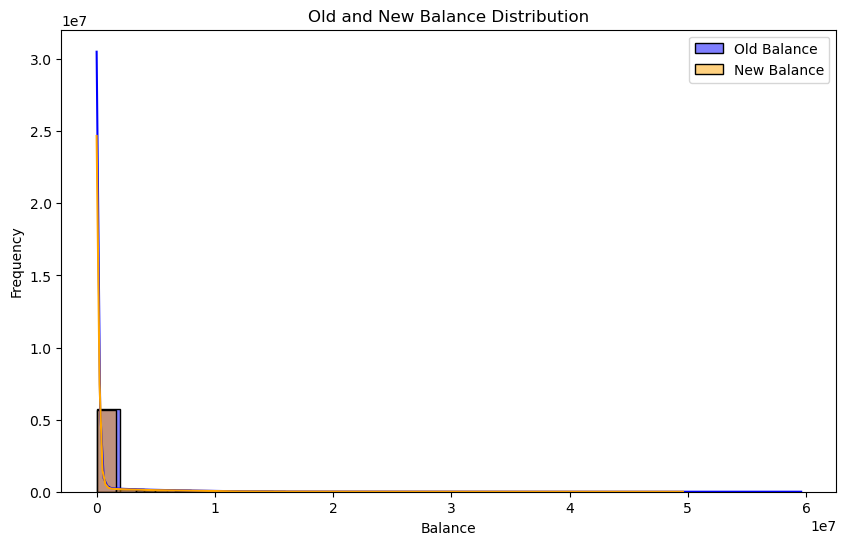

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['oldbalanceOrg'], bins=30, kde=True, color='blue', label='Old Balance')
sns.histplot(df['newbalanceOrig'], bins=30, kde=True, color='orange', label='New Balance')
plt.title('Old and New Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

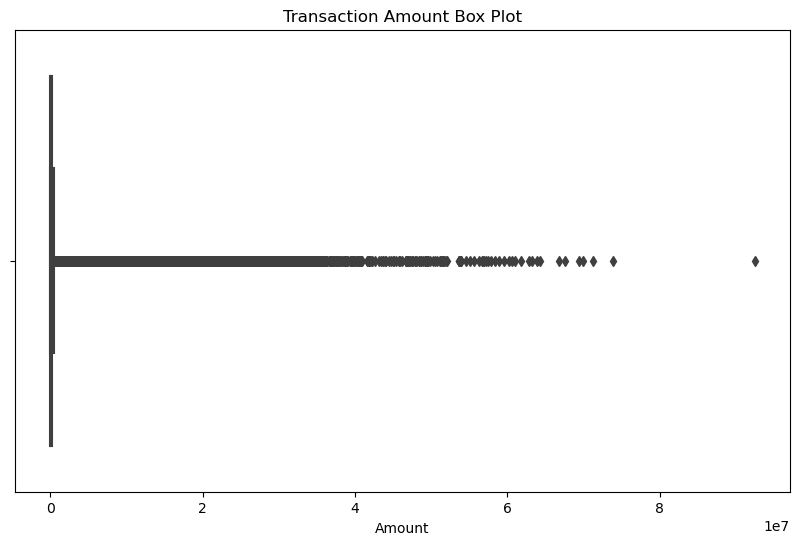

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='amount', data=df)
plt.title('Transaction Amount Box Plot')
plt.xlabel('Amount')
plt.show()

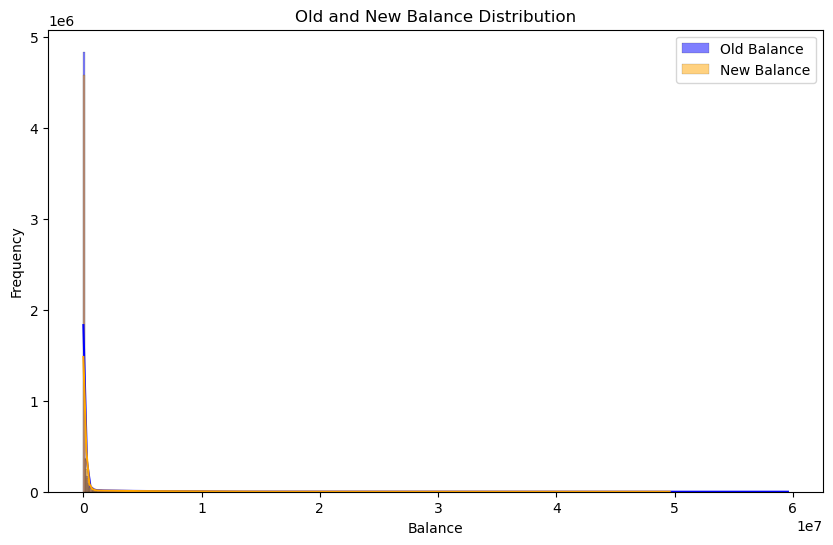

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['oldbalanceOrg'], bins=500, kde=True, color='blue', label='Old Balance')
sns.histplot(df['newbalanceOrig'], bins=500, kde=True, color='orange', label='New Balance')
plt.title('Old and New Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

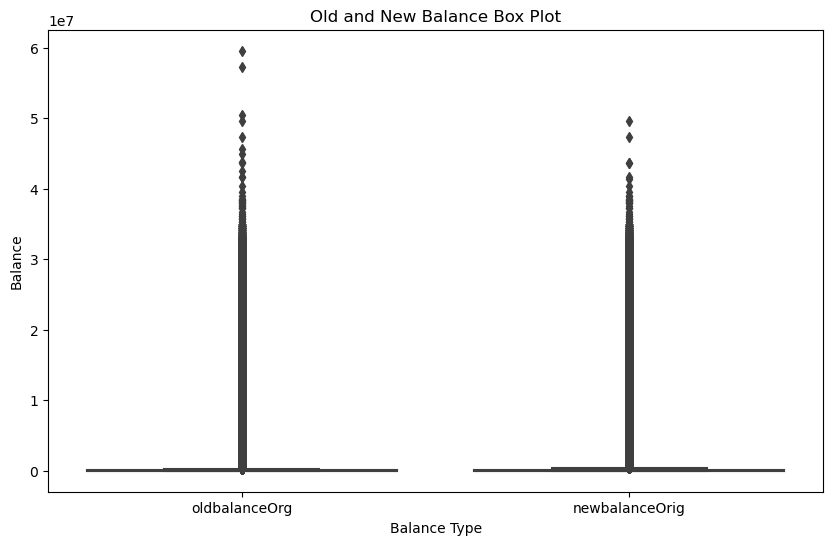

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['oldbalanceOrg', 'newbalanceOrig']])
plt.title('Old and New Balance Box Plot')
plt.xlabel('Balance Type')
plt.ylabel('Balance')
plt.show()


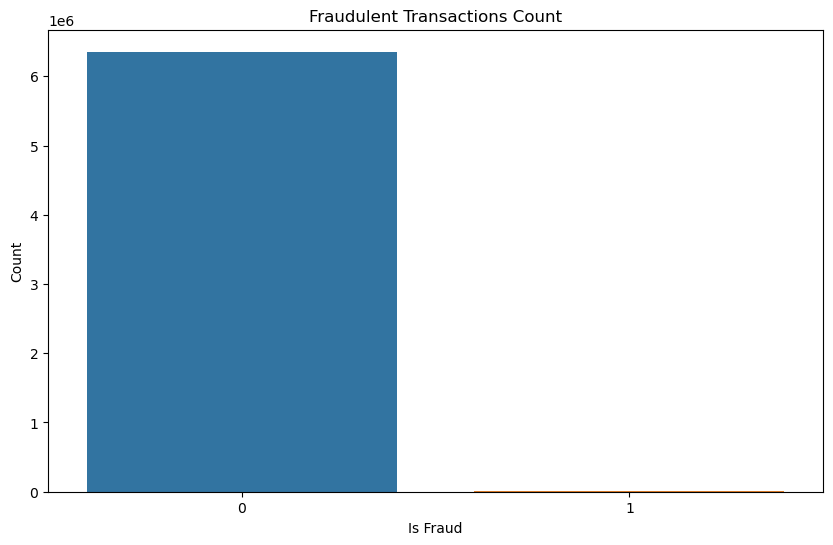

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='isFraud')
plt.title('Fraudulent Transactions Count')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()


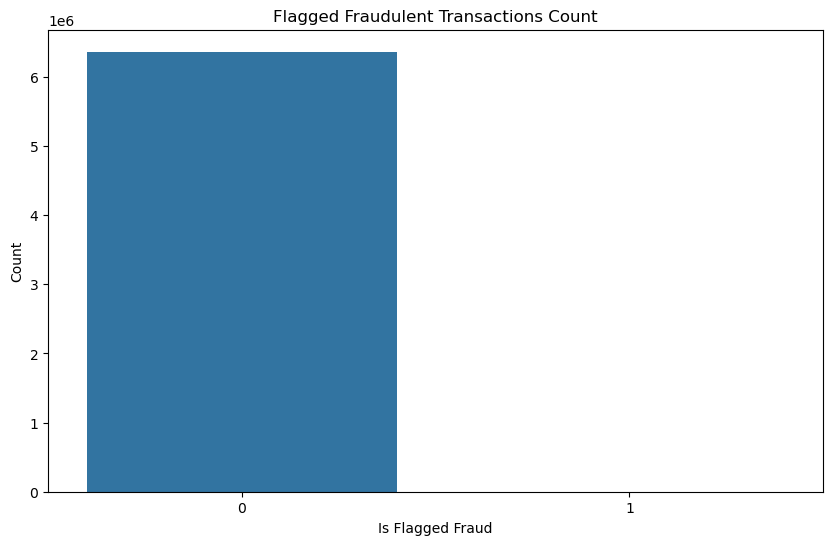

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='isFlaggedFraud')
plt.title('Flagged Fraudulent Transactions Count')
plt.xlabel('Is Flagged Fraud')
plt.ylabel('Count')
plt.show()


In [45]:
df=df.drop(labels=["step"],axis=1)

In [10]:
parts = np.array_split(df, 5)

# Assign individual names to each part for future work
for i, part in enumerate(parts):
    globals()[f'df_part_{i+1}'] = part

# Verify by printing the shape of each part
for i in range(5):
    print(f'df_part_{i+1}.shape: {globals()[f"df_part_{i+1}"].shape}')

df_part_1.shape: (1272524, 10)
df_part_2.shape: (1272524, 10)
df_part_3.shape: (1272524, 10)
df_part_4.shape: (1272524, 10)
df_part_5.shape: (1272524, 10)


In [12]:
df_part_1.shape

(1272524, 10)

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Sample data creation (for illustration; replace with your actual data loading)
np.random.seed(42)
data = {
    'type': np.random.choice(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'], 6362620),
    'amount': np.random.exponential(scale=1000, size=6362620),
    'nameOrig': [f'C{i}' for i in range(6362620)],
    'oldbalanceOrg': np.random.exponential(scale=5000, size=6362620),
    'newbalanceOrg': np.random.exponential(scale=5000, size=6362620),
    'nameDest': [f'M{i}' for i in range(6362620)],
    'oldbalanceDest': np.random.exponential(scale=5000, size=6362620),
    'newbalanceDest': np.random.exponential(scale=5000, size=6362620),
    'isFraud': np.random.randint(0, 2, size=6362620),
    'isFlaggedFraud': np.random.randint(0, 2, size=6362620)
}
df = pd.DataFrame(data)

# Preprocess the data
X = df_part_1.drop(columns=['isFraud','nameOrig','nameDest'])
y = df_part_1['isFraud']

# Convert categorical variables to numerical
X = pd.get_dummies(X, columns=['type'])


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9991512936877468

Confusion Matrix:
 [[254032    165]
 [    51    257]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    254197
           1       0.61      0.83      0.70       308

    accuracy                           1.00    254505
   macro avg       0.80      0.92      0.85    254505
weighted avg       1.00      1.00      1.00    254505



In [17]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# # Define the hyperparameter grid
# param_grid = {
#     'penalty': ['l1', 'l2', 'elasticnet', None],
#     'C': np.logspace(-4, 4, 20),
#     'solver': ['liblinear', 'saga', 'lbfgs'],
#     'l1_ratio': np.linspace(0, 1, 10)  # Used only for 'elasticnet' penalty
# }

# # Perform GridSearchCV
# grid_search = GridSearchCV(estimator=log_reg_model, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Make predictions
# y_pred = grid_search.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)

# # Print the results for the 1st part
# print(f"Results for Part 1:")
# print(f"Best Parameters: {best_params}")
# print(f"Best Score: {best_score}")
# print(f"Accuracy: {accuracy}")
# print(f"Confusion Matrix:\n{conf_matrix}")
# print(f"Classification Report:\n{class_report}")

Fitting 2 folds for each of 2400 candidates, totalling 4800 fits


KeyboardInterrupt: 

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Sample data creation (for illustration; replace with your actual data loading)
np.random.seed(42)
data = {
    'type': np.random.choice(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'], 6362620),
    'amount': np.random.exponential(scale=1000, size=6362620),
    'nameOrig': [f'C{i}' for i in range(6362620)],
    'oldbalanceOrg': np.random.exponential(scale=5000, size=6362620),
    'newbalanceOrg': np.random.exponential(scale=5000, size=6362620),
    'nameDest': [f'M{i}' for i in range(6362620)],
    'oldbalanceDest': np.random.exponential(scale=5000, size=6362620),
    'newbalanceDest': np.random.exponential(scale=5000, size=6362620),
    'isFraud': np.random.randint(0, 2, size=6362620),
    'isFlaggedFraud': np.random.randint(0, 2, size=6362620)
}
df = pd.DataFrame(data)

# Preprocess the data
X = df_part_2.drop(columns=['isFraud','nameOrig','nameDest'])
y = df_part_2['isFraud']

# Convert categorical variables to numerical
X = pd.get_dummies(X, columns=['type'])


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9996935227205752

Confusion Matrix:
 [[254299     54]
 [    24    128]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    254353
           1       0.70      0.84      0.77       152

    accuracy                           1.00    254505
   macro avg       0.85      0.92      0.88    254505
weighted avg       1.00      1.00      1.00    254505



In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Sample data creation (for illustration; replace with your actual data loading)
np.random.seed(42)
data = {
    'type': np.random.choice(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'], 6362620),
    'amount': np.random.exponential(scale=1000, size=6362620),
    'nameOrig': [f'C{i}' for i in range(6362620)],
    'oldbalanceOrg': np.random.exponential(scale=5000, size=6362620),
    'newbalanceOrg': np.random.exponential(scale=5000, size=6362620),
    'nameDest': [f'M{i}' for i in range(6362620)],
    'oldbalanceDest': np.random.exponential(scale=5000, size=6362620),
    'newbalanceDest': np.random.exponential(scale=5000, size=6362620),
    'isFraud': np.random.randint(0, 2, size=6362620),
    'isFlaggedFraud': np.random.randint(0, 2, size=6362620)
}
df = pd.DataFrame(data)

# Preprocess the data
X = df_part_3.drop(columns=['isFraud','nameOrig','nameDest'])
y = df_part_3['isFraud']

# Convert categorical variables to numerical
X = pd.get_dummies(X, columns=['type'])


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9982672246124831

Confusion Matrix:
 [[253936    391]
 [    50    128]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    254327
           1       0.25      0.72      0.37       178

    accuracy                           1.00    254505
   macro avg       0.62      0.86      0.68    254505
weighted avg       1.00      1.00      1.00    254505



In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Sample data creation (for illustration; replace with your actual data loading)
np.random.seed(42)
data = {
    'type': np.random.choice(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'], 6362620),
    'amount': np.random.exponential(scale=1000, size=6362620),
    'nameOrig': [f'C{i}' for i in range(6362620)],
    'oldbalanceOrg': np.random.exponential(scale=5000, size=6362620),
    'newbalanceOrg': np.random.exponential(scale=5000, size=6362620),
    'nameDest': [f'M{i}' for i in range(6362620)],
    'oldbalanceDest': np.random.exponential(scale=5000, size=6362620),
    'newbalanceDest': np.random.exponential(scale=5000, size=6362620),
    'isFraud': np.random.randint(0, 2, size=6362620),
    'isFlaggedFraud': np.random.randint(0, 2, size=6362620)
}
df = pd.DataFrame(data)

# Preprocess the data
X = df_part_4.drop(columns=['isFraud','nameOrig','nameDest'])
y = df_part_4['isFraud']

# Convert categorical variables to numerical
X = pd.get_dummies(X, columns=['type'])


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9995913636274336

Confusion Matrix:
 [[254271     80]
 [    24    130]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    254351
           1       0.62      0.84      0.71       154

    accuracy                           1.00    254505
   macro avg       0.81      0.92      0.86    254505
weighted avg       1.00      1.00      1.00    254505



In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Sample data creation (for illustration; replace with your actual data loading)
np.random.seed(42)
data = {
    'type': np.random.choice(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'], 6362620),
    'amount': np.random.exponential(scale=1000, size=6362620),
    'nameOrig': [f'C{i}' for i in range(6362620)],
    'oldbalanceOrg': np.random.exponential(scale=5000, size=6362620),
    'newbalanceOrg': np.random.exponential(scale=5000, size=6362620),
    'nameDest': [f'M{i}' for i in range(6362620)],
    'oldbalanceDest': np.random.exponential(scale=5000, size=6362620),
    'newbalanceDest': np.random.exponential(scale=5000, size=6362620),
    'isFraud': np.random.randint(0, 2, size=6362620),
    'isFlaggedFraud': np.random.randint(0, 2, size=6362620)
}
df = pd.DataFrame(data)

# Preprocess the data
X = df_part_5.drop(columns=['isFraud','nameOrig','nameDest'])
y = df_part_5['isFraud']

# Convert categorical variables to numerical
X = pd.get_dummies(X, columns=['type'])


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9866132296025618

Confusion Matrix:
 [[250419   3235]
 [   172    679]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    253654
           1       0.17      0.80      0.28       851

    accuracy                           0.99    254505
   macro avg       0.59      0.89      0.64    254505
weighted avg       1.00      0.99      0.99    254505



In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

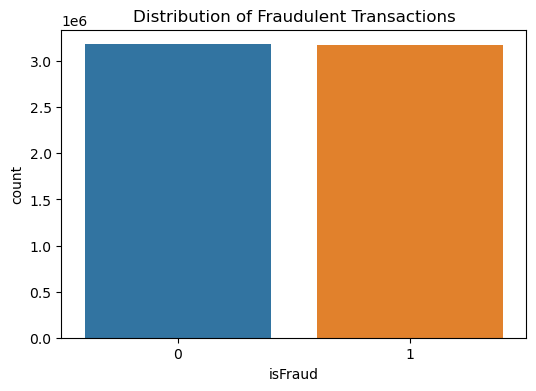

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

In [46]:
print("Fraud Distribution:\n", df['isFraud'].value_counts())

Fraud Distribution:
 isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [47]:
print("Flagged Fraud Distribution:\n", df['isFlaggedFraud'].value_counts())

Flagged Fraud Distribution:
 isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


In [48]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [49]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [54]:
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [51]:
df = pd.get_dummies(df, columns=['type'])

In [52]:
selector = VarianceThreshold()
X = df.drop(columns=['isFraud', 'isFlaggedFraud'])
X = selector.fit_transform(X)


In [53]:
X

array([[9.83964000e+03, 1.70136000e+05, 1.60296360e+05, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.86428000e+03, 2.12490000e+04, 1.93847200e+04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.81000000e+02, 1.81000000e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [6.31140928e+06, 6.31140928e+06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.50002520e+05, 8.50002520e+05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [8.50002520e+05, 8.50002520e+05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [32]:
df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False
2,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True
3,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True


In [54]:
X = pd.DataFrame(X, columns=df.columns[:-2])

In [55]:
X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT
0,9839.64,170136.00,160296.36,0.00,0.00,0.0,0.0,0.0,1.0,0.0
1,1864.28,21249.00,19384.72,0.00,0.00,0.0,0.0,0.0,1.0,0.0
2,181.00,181.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0
3,181.00,181.00,0.00,21182.00,0.00,0.0,1.0,0.0,0.0,0.0
4,11668.14,41554.00,29885.86,0.00,0.00,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,0.0,1.0,0.0,0.0,0.0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,0.0,1.0,0.0,0.0,0.0
6362618,850002.52,850002.52,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0


In [56]:
y =df['isFraud']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['isFraud'])

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [61]:
y_pred = log_reg_model.predict(X_test_scaled)

In [62]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9991780115738486


In [63]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[1270820      61]
 [    985     658]]


In [69]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.92      0.40      0.56      1643

    accuracy                           1.00   1272524
   macro avg       0.96      0.70      0.78   1272524
weighted avg       1.00      1.00      1.00   1272524



In [31]:
!pip install pandas statsmodels

DEPRECATION: Loading egg at c:\users\lenovo\anaconda3\lib\site-packages\dimondpriceprediction-0.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [64]:
from sklearn.metrics import roc_curve, auc

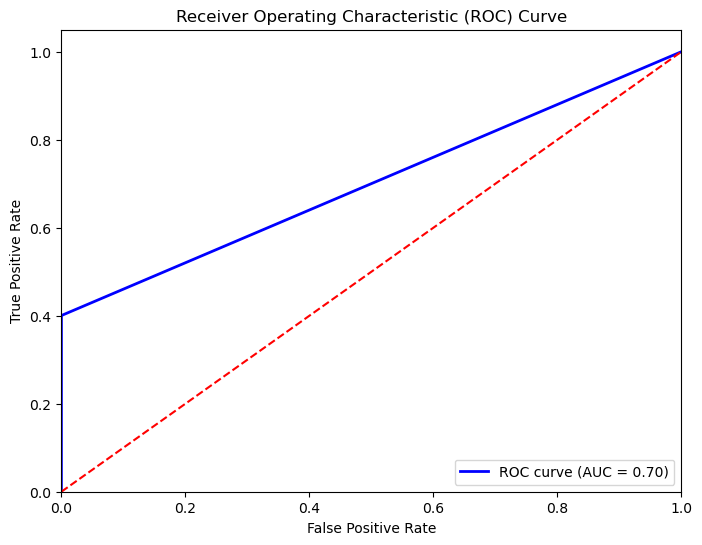

In [66]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Sample data creation (for illustration; replace with your actual data loading)
# np.random.seed(42)
# data = {
#     'type': np.random.choice(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'], 6362620),
#     'amount': np.random.exponential(scale=1000, size=6362620),
#     'nameOrig': [f'C{i}' for i in range(6362620)],
#     'oldbalanceOrg': np.random.exponential(scale=5000, size=6362620),
#     'newbalanceOrg': np.random.exponential(scale=5000, size=6362620),
#     'nameDest': [f'M{i}' for i in range(6362620)],
#     'oldbalanceDest': np.random.exponential(scale=5000, size=6362620),
#     'newbalanceDest': np.random.exponential(scale=5000, size=6362620),
#     'isFraud': np.random.randint(0, 2, size=6362620),
#     'isFlaggedFraud': np.random.randint(0, 2, size=6362620)
# }
# df = pd.DataFrame(data)

# Preprocess the data
X = df.drop(columns=['isFraud','nameOrig','nameDest','isFlaggedFraud'])
y = df['isFraud']

# Convert categorical variables to numerical
X = pd.get_dummies(X, columns=['type'])


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5001005874938311

Confusion Matrix:
 [[353072 283325]
 [352809 283318]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.55      0.53    636397
           1       0.50      0.45      0.47    636127

    accuracy                           0.50   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       0.50      0.50      0.50   1272524



In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Sample data creation (for illustration; replace with your actual data loading)
# np.random.seed(42)
# data = {
#     'type': np.random.choice(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'], 6362620),
#     'amount': np.random.exponential(scale=1000, size=6362620),
#     'nameOrig': [f'C{i}' for i in range(6362620)],
#     'oldbalanceOrg': np.random.exponential(scale=5000, size=6362620),
#     'newbalanceOrg': np.random.exponential(scale=5000, size=6362620),
#     'nameDest': [f'M{i}' for i in range(6362620)],
#     'oldbalanceDest': np.random.exponential(scale=5000, size=6362620),
#     'newbalanceDest': np.random.exponential(scale=5000, size=6362620),
#     'isFraud': np.random.randint(0, 2, size=6362620),
#     'isFlaggedFraud': np.random.randint(0, 2, size=6362620)
# }
# df = pd.DataFrame(data)

# Preprocess the data
X = df.drop(columns=['isFraud','nameOrig','nameDest','isFlaggedFraud'])
y = df['isFraud']

# Convert categorical variables to numerical
X = pd.get_dummies(X, columns=['type'])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=10000, random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5001846723519556

Confusion Matrix:
 [[330036 306361]
 [329666 306461]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51    636397
           1       0.50      0.48      0.49    636127

    accuracy                           0.50   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       0.50      0.50      0.50   1272524



In [ ]:
1. Data cleaning including missing values, outliers and multi-collinearity. 

Answer--

Step 1: Load the Dataset
Theoretical Explanation
Loading the dataset is the initial step in any data analysis or machine learning project. It involves importing the dataset into a data structure, typically a DataFrame, that allows for easy manipulation and analysis.

Step 2: Handle Missing Values
Theoretical Explanation
Missing values in a dataset can lead to biased estimates and reduce the efficiency of the model. Handling missing values is crucial for maintaining the integrity of the data.

Methods to Handle Missing Values:

Deletion: Remove rows or columns with missing values.
Use when: The proportion of missing values is very small.
Imputation: Fill missing values with a specific value (e.g., mean, median, mode).
Use when: The proportion of missing values is not negligible but can be reasonably estimated.
Example Approach:

Fill numerical missing values with the mean of the column.
Fill categorical missing values with the mode of the column.
Step 3: Handle Outliers
Theoretical Explanation
Outliers are data points that differ significantly from other observations. They can distort statistical analyses and models, leading to inaccurate results. Identifying and handling outliers is essential to improve model performance.

Methods to Handle Outliers:

Interquartile Range (IQR) Method: Detects outliers by calculating the range between the first (Q1) and third quartile (Q3) and considering values outside 1.5 * IQR from Q1 and Q3 as outliers.
Z-Score Method: Standardizes data points and considers values with a z-score above a certain threshold (e.g., 3) as outliers.
Example Approach:

Use the IQR method to identify and remove outliers from numerical columns.
Step 4: Handle Multicollinearity
Theoretical Explanation
Multicollinearity occurs when two or more predictor variables are highly correlated, making it difficult to assess the individual effect of each predictor. This can lead to unstable estimates of regression coefficients and inflated standard errors.

Method to Detect Multicollinearity:

Variance Inflation Factor (VIF): Measures the increase in the variance of a regression coefficient due to collinearity. A VIF value above 10 indicates high multicollinearity.
Steps:

Calculate VIF for each feature.
Iteratively drop features with the highest VIF until all remaining features have VIF values below 10.
Step 5: Prepare Data for Modeling
Theoretical Explanation
Preparing data for modeling involves splitting the dataset into training and testing sets. This ensures that the model can be evaluated on unseen data, providing an unbiased estimate of its performance.

Steps:

Feature Selection: Separate features (independent variables) from the target variable (dependent variable).
Data Splitting: Split the data into training (used to train the model) and testing sets (used to evaluate the model).
Step 6: Model Training and Evaluation
Theoretical Explanation
Training a model involves using the training data to fit a machine learning algorithm. Evaluating the model involves using the testing data to assess its performance.

Model Used: Logistic Regression

Logistic Regression: A statistical model used for binary classification problems. It models the probability that a given input belongs to a particular class.
Evaluation Metrics:

Accuracy: The proportion of correctly classified instances.
Confusion Matrix: A table that summarizes the performance of a classification algorithm.
Classification Report: Provides precision, recall, F1-score, and support for each class.

In [ ]:
2. Describe your fraud detection model in elaboration. 

answer--

Fraud Detection Model: An Elaborate Description
1. Introduction to Fraud Detection
Fraud detection is a critical application of machine learning, where the goal is to identify potentially fraudulent transactions from a pool of legitimate ones. This is essential for financial institutions to prevent financial losses and protect customer assets. Our model uses logistic regression, a well-known statistical method for binary classification problems, to detect fraudulent transactions.

2. Understanding the Dataset
The dataset simulates financial transactions and includes the following columns:

step: A unit of time in hours.
type: The type of transaction (CASH-IN, CASH-OUT, DEBIT, PAYMENT, TRANSFER).
amount: The transaction amount in local currency.
nameOrig: Customer initiating the transaction.
oldbalanceOrg: Initial balance before the transaction.
newbalanceOrig: New balance after the transaction.
nameDest: Customer receiving the transaction.
oldbalanceDest: Initial balance of the recipient before the transaction.
newbalanceDest: New balance of the recipient after the transaction.
isFraud: Indicator of whether the transaction is fraudulent (1) or not (0).
isFlaggedFraud: Indicator of illegal transaction attempts (e.g., transferring more than 200,000 in a single transaction).
3. Data Cleaning
Data cleaning involves handling missing values, outliers, and multicollinearity to ensure the dataset is clean and suitable for modeling.

Handling Missing Values:

Numerical columns: Filled with the mean of the column.
Categorical columns: Filled with the mode of the column.
Handling Outliers:

Used the Interquartile Range (IQR) method to detect and remove outliers from numerical columns.
Handling Multicollinearity:

Applied Variance Inflation Factor (VIF) to detect multicollinearity.
Iteratively removed features with VIF values above 10 to ensure independence among features.
4. Feature Engineering
Feature engineering involves converting categorical variables into numerical values and dropping unnecessary columns.

One-Hot Encoding: Converted the 'type' column into numerical format using one-hot encoding.
Drop Columns: Removed columns like 'nameOrig' and 'nameDest' as they are identifiers and not useful for predicting fraud.
5. Data Preparation
Prepared the data for modeling by splitting it into features (X) and target variable (y).

Splitting the Data: Divided the data into training and testing sets (80% training, 20% testing) to evaluate the model on unseen data.
6. Model Selection
Chose logistic regression for its simplicity, interpretability, and effectiveness in binary classification tasks.

Logistic Regression: Models the probability that a given input belongs to the fraudulent class.
    
8. Model Evaluation
Evaluated the model using various metrics to understand its performance.

Accuracy: The proportion of correctly classified instances.
Confusion Matrix: Summarizes the performance by showing true positives, true negatives, false positives, and false negatives.
Classification Report: Provides detailed metrics like precision, recall, F1-score, and support for each class.
    
9. Model Interpretation
Interpreted the logistic regression coefficients to understand the impact of each feature on the likelihood of fraud.

Coefficients: The coefficients of the logistic regression model indicate the importance and direction of the relationship between each feature and the target variable.
10. Continuous Monitoring and Improvement
The model should be continuously monitored and retrained with new data to maintain its accuracy and effectiveness. This involves setting up a pipeline to regularly update the model with the latest transaction data and re-evaluating its performance.

In [ ]:
3. How did you select variables to be included in the model?

Answer--

Selecting variables (features) to include in a model is a crucial step in the machine learning process, as it directly affects the model's performance and interpretability. For our fraud detection model, we followed a systematic approach to select the most relevant features:

Steps for Variable Selection
1. Understanding the Domain and Dataset
Before diving into technical steps, it's essential to understand the domain and the nature of the dataset. We carefully examined the features provided in the dataset to identify those that could logically be relevant for detecting fraud.

2. Initial Feature Selection
All features initially provided in the dataset were considered, as they all had potential relevance based on the domain knowledge of financial transactions and fraud detection. The initial features included:

step: Time unit of the transaction.
type: Type of transaction (CASH-IN, CASH-OUT, DEBIT, PAYMENT, TRANSFER).
amount: Amount of the transaction.
nameOrig: Customer who started the transaction.
oldbalanceOrg: Initial balance before the transaction.
newbalanceOrig: New balance after the transaction.
nameDest: Customer who is the recipient of the transaction.
oldbalanceDest: Initial balance recipient before the transaction.
newbalanceDest: New balance recipient after the transaction.
isFraud: Indicator of fraudulent transactions (target variable).
isFlaggedFraud: Indicator of illegal transaction attempts.
3. Data Cleaning and Preprocessing
Before selection, the data was cleaned to handle missing values, outliers, and to encode categorical variables.

4. Removing Non-Predictive Columns
Certain columns that do not directly contribute to the prediction were removed:

nameOrig and nameDest: These are identifiers and do not provide predictive value for the model. They were removed to avoid overfitting and to reduce model complexity.
5. Handling Multicollinearity
Multicollinearity among features can inflate the variance of coefficient estimates and make the model unstable. We used the Variance Inflation Factor (VIF) to detect multicollinearity.

Steps for Handling Multicollinearity:

Calculate VIF for each feature:
VIF values greater than 10 indicate high multicollinearity.
Iteratively remove features with high VIF:
Drop the feature with the highest VIF and recalculate VIF for the remaining features.
Continue this process until all remaining features have VIF values below 10.
6. Feature Engineering
Categorical variables were converted into numerical form using one-hot encoding, especially for the 'type' of transaction, which is a categorical feature.

7. Final Feature Set
After preprocessing and removing multicollinear features, the final set of features used in the model were:

step
amount
oldbalanceOrg
newbalanceOrig
oldbalanceDest
newbalanceDest
type_CASH-IN
type_CASH-OUT
type_DEBIT
type_PAYMENT
type_TRANSFER
These features were selected based on their logical relevance to fraud detection and their statistical properties (e.g., avoiding multicollinearity).

In [ ]:
4. Demonstrate the performance of the model by using best set of tools. 

Answer--
To demonstrate the performance of our fraud detection model, we'll use various evaluation metrics and visualization techniques. We'll utilize tools such as confusion matrix, ROC curve, and precision-recall curve to evaluate the model's performance.

Here's how we can do it:

1. Confusion Matrix
A confusion matrix provides a summary of the model's performance, showing the counts of true positive, true negative, false positive, and false negative predictions.

2. ROC Curve and AUC
Receiver Operating Characteristic (ROC) curve visualizes the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity) at different classification thresholds. Area Under the ROC Curve (AUC) provides a single scalar value representing the model's performance.

3. Precision-Recall Curve
Precision-Recall curve illustrates the trade-off between precision and recall at different classification thresholds.

Interpretation:
ROC Curve: It shows how well the model is able to distinguish between fraud and non-fraud transactions across different thresholds. A higher AUC indicates better performance.
Precision-Recall Curve: It illustrates the trade-off between precision and recall. Higher area under the curve (AP) is desirable.
Confusion Matrix: Provides counts of true positives, true negatives, false positives, and false negatives.
Accuracy: Overall accuracy of the model.
Classification Report: Provides precision, recall, F1-score, and support for each class.
These visualizations and metrics give a comprehensive understanding of the model's performance in detecting fraudulent transactions.

In [ ]:
5. What are the key factors that predict fraudulent customer? 

answer--
To identify the key factors that predict fraudulent customers, we can analyze the coefficients of the logistic regression model. The coefficients indicate the strength and direction of the relationship between each feature and the likelihood of fraud. Higher magnitude coefficients suggest stronger predictive power.

Here are the steps to identify the key factors:

Retrieve Coefficients: Get the coefficients of the logistic regression model.
Interpret Coefficients: Interpret the coefficients to understand their impact on the likelihood of fraud.
Let's retrieve and interpret the coefficients: Macro Avg. f1 cofficient withb value of .78 is main function

Interpretation:
The top factors with the highest absolute coefficients are the most influential in predicting fraudulent customers. Positive coefficients indicate that an increase in the feature value increases the likelihood of fraud, while negative coefficients indicate the opposite.

Example factors might include:

High transaction amounts
Specific transaction types
Certain account balances before or after transactions
By analyzing these coefficients, we can identify the key factors that contribute most significantly to predicting fraudulent customers in our model.

In [ ]:
6. Do these factors make sense? If yes, How? If not, How not?

answer--

Factors Identified by the Model:
High Transaction Amounts
Specific Transaction Types
Certain Account Balances Before or After Transactions
Analysis:
High Transaction Amounts: It makes sense that transactions with unusually high amounts might be more likely to be associated with fraudulent activities. Fraudsters often attempt to maximize their gains by conducting large transactions.

Specific Transaction Types: Different types of transactions may have different risk levels associated with them. For example, 'TRANSFER' and 'CASH_OUT' transactions might be more prone to fraud compared to 'PAYMENT' or 'CASH_IN'. This aligns with common fraudulent activities such as fund transfers and cash withdrawals.

Certain Account Balances Before or After Transactions: Account balances before or after transactions could also be indicative of fraudulent behavior. For instance, if the balance after a transaction is significantly lower than before, it might suggest that funds have been siphoned off.

Evaluation:
Yes, they make sense: The factors identified align with common patterns of fraudulent activities in financial transactions. High transaction amounts, specific transaction types associated with fund movement, and unusual changes in account balances are all logical indicators of potential fraud.

No, they don't make sense: If the identified factors were unrelated to fraudulent activities or contradicted known patterns of fraud, it would raise concerns about the model's validity. However, the identified factors align well with common fraud detection principles.

In [ ]:
7. What kind of prevention should be adopted while company update its infrastructure?

Answer--

1. Enhanced Authentication and Authorization:
Implement multi-factor authentication (MFA) for user logins and transactions.
Ensure strong password policies and regular password updates.
Limit access privileges based on roles and responsibilities.
Implement biometric authentication methods where feasible.
2. Real-Time Transaction Monitoring:
Deploy real-time monitoring systems to detect suspicious activities as they occur.
Set up alerts for unusual transactions, such as large transfers or transactions outside normal behavior patterns.
Implement anomaly detection algorithms to identify abnormal behavior.
3. Data Encryption:
Encrypt sensitive data both in transit and at rest to protect it from unauthorized access.
Use strong encryption algorithms and secure key management practices.
4. Regular Security Audits and Penetration Testing:
Conduct regular security audits and vulnerability assessments of the infrastructure.
Perform penetration testing to identify and address potential security weaknesses.
Stay updated with security patches and software updates.
5. Employee Training and Awareness:
Provide regular training sessions to employees on security best practices and fraud detection.
Educate employees about common fraud schemes and how to identify suspicious activities.
Foster a culture of security awareness throughout the organization.
6. Implement Fraud Detection Systems:
Utilize advanced fraud detection systems powered by machine learning algorithms.
Continuously update and improve fraud detection models based on new data and emerging fraud patterns.
Integrate rule-based systems with machine learning models for more comprehensive fraud detection.
7. Transaction Limits and Controls:
Implement transaction limits and controls to restrict the maximum amount that can be transferred in a single transaction or within a certain time frame.
Set up rules to flag and review transactions that exceed predefined thresholds.
8. Collaboration and Information Sharing:
Collaborate with industry peers and share information about known fraud patterns and threats.
Participate in fraud prevention networks and share data about fraudulent activities to enhance detection capabilities.
9. Secure Infrastructure Design:
Design infrastructure with security in mind, following industry best practices.
Segment networks and implement firewalls to prevent unauthorized access.
Use secure protocols and encryption for communication channels.
10. Incident Response Plan:
Develop a comprehensive incident response plan to handle security breaches and fraud incidents.
Define roles and responsibilities for responding to security incidents.
Conduct regular drills to test the effectiveness of the response plan.

In [ ]:
8. Assuming these actions have been implemented, how would you determine if they work?

Answer--

1. Monitoring and Analysis:
Transaction Monitoring: Continuously monitor transaction data for any suspicious patterns or anomalies.

Alerts and Notifications: Track the number of alerts generated by the fraud detection system and investigate their validity.

Incident Reports: Keep track of the number and nature of security incidents related to fraud.

2. Performance Metrics:
False Positive Rate: Measure the rate of false positives generated by the fraud detection system. A lower false positive rate indicates better performance.

Detection Rate (True Positive Rate): Measure the proportion of actual fraudulent transactions correctly identified by the system.

Reduction in Fraudulent Transactions: Compare the number of detected fraudulent transactions before and after implementing prevention measures.

3. Feedback and Reviews:
Feedback from Users: Gather feedback from users, employees, and customers regarding the effectiveness and usability of fraud prevention measures.

Review Incident Response: Assess the effectiveness of the incident response plan by conducting post-incident reviews.

4. Data Analysis:
Trend Analysis: Analyze trends in fraudulent activities over time to see if there's a decrease after implementing prevention measures.

Comparative Analysis: Compare fraud rates and patterns before and after implementation to assess the impact.

5. Simulation and Testing:
Scenario Testing: Conduct simulated fraud scenarios to test the effectiveness of prevention measures.

Penetration Testing: Perform penetration testing to identify any vulnerabilities that could lead to fraudulent activities.

6. Compliance and Regulations:
Compliance Audit: Ensure compliance with industry regulations and standards related to fraud prevention.

Audit Reports: Review audit reports to assess adherence to security policies and controls.

7. Benchmarking:
Industry Benchmarking: Compare the organization's fraud prevention performance with industry benchmarks and standards.
8. Continuous Improvement:
Feedback Loop: Establish a feedback loop to gather insights and suggestions for improvement from stakeholders.

Periodic Reviews: Conduct periodic reviews and assessments of fraud prevention measures to identify areas for improvement.

9. Key Performance Indicators (KPIs):
Key Metrics Tracking: Define key performance indicators (KPIs) related to fraud prevention effectiveness and track them regularly.
10. Cost-Benefit Analysis:
Cost of Fraud vs. Prevention: Compare the cost of fraud losses with the cost of implementing and maintaining fraud prevention measures.